In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Gaussian Naive Baye's

In [3]:
from sklearn.datasets import make_classification

##### Data

In [4]:
X,y=make_classification(n_samples=1000,n_features=2,n_classes=2,n_clusters_per_class=2,n_redundant=0)

In [5]:
data = pd.DataFrame(X, columns=["A","B"])

In [7]:
data.head()

,A,B
0,-0.539563,0.253201
1,1.526785,-0.466915
2,-1.004483,0.978834
3,-0.660740,-2.369101
4,-1.610471,-1.426099


<Axes: xlabel='A', ylabel='B'>

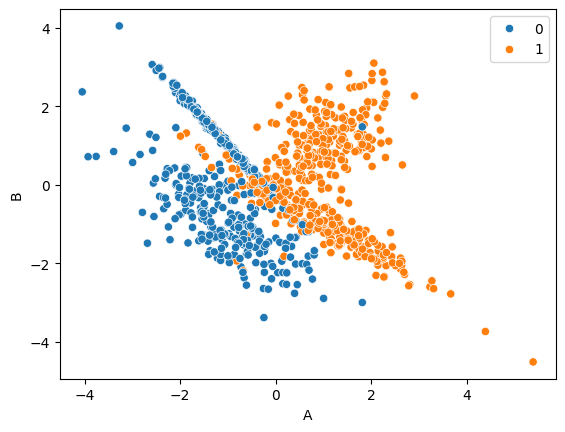

In [8]:
sns.scatterplot(x=data["A"],y=data["B"],hue=y)

##### Training and testing data split

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)

##### Model

In [14]:
from sklearn.naive_bayes import GaussianNB

In [16]:
GNB = GaussianNB()

In [17]:
GNB.fit(x_train,y_train)

GaussianNB()

In [19]:
y_predictions = GNB.predict(x_test)

##### Metrics

In [20]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [21]:
print(f"Classification Report:\n {classification_report(y_test,y_predictions)}")



Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91       144
           1       0.92      0.92      0.92       156

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



In [26]:
print(f"Confusion Matrix:\n {confusion_matrix(y_test,y_predictions)}")
print(f"Accuracy: {accuracy_score(y_test,y_predictions)}")

Confusion Matrix:
 [[131  13]
 [ 13 143]]
Accuracy: 0.9133333333333333


## Multinomial Naive Baye

##### Data

In [29]:
data = pd.read_csv('Churn_Modelling.csv')

In [30]:
data = data.dropna(axis=0)
#Removing column surname
data.drop(columns="Surname", inplace=True)

In [31]:
#Converting category columns into numeric type
cat_cols = data.select_dtypes("object").columns

for col in cat_cols:
    data[col] = pd.factorize(data[col])[0]

In [32]:
X = data.drop(columns="Exited")
y = data["Exited"]

In [33]:
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size=0.3)

##### Model

In [34]:
from sklearn.naive_bayes import MultinomialNB

In [35]:
MNB = MultinomialNB()
MNB.fit(x_train,y_train)

MultinomialNB()

In [36]:
y_pred = MNB.predict(x_test)

In [38]:
print(f"Classification Report: \n {classification_report(y_test,y_pred)}")
print(f"Confusion Matrix:\n {confusion_matrix(y_test,y_pred)}")
print(f"Accuracy: {accuracy_score(y_test,y_pred)}")

Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.45      0.59      2438
           1       0.22      0.69      0.34       562

    accuracy                           0.49      3000
   macro avg       0.54      0.57      0.46      3000
weighted avg       0.74      0.49      0.54      3000

Confusion Matrix:
 [[1092 1346]
 [ 175  387]]
Accuracy: 0.493


#### GridSearchCV

In [39]:
from sklearn.model_selection import GridSearchCV

In [46]:
MNB_GSCV = GridSearchCV(estimator=MultinomialNB(), param_grid={'alpha':[0.1,0.5,0.75,1.0]}, cv=3)

In [47]:
MNB_GSCV.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=MultinomialNB(),
             param_grid={'alpha': [0.1, 0.5, 0.75, 1.0]})

In [48]:
MNB_GSCV.best_params_

{'alpha': 0.1}

In [49]:
predictions = MNB_GSCV.predict(x_test)

In [50]:
print(f"Classification Report: \n {classification_report(y_test,predictions)}")
print(f"Confusion Matrix:\n {confusion_matrix(y_test,predictions)}")
print(f"Accuracy: {accuracy_score(y_test,predictions)}")

Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.45      0.59      2438
           1       0.22      0.69      0.34       562

    accuracy                           0.49      3000
   macro avg       0.54      0.57      0.46      3000
weighted avg       0.74      0.49      0.54      3000

Confusion Matrix:
 [[1092 1346]
 [ 175  387]]
Accuracy: 0.493
